## Import Libraries

In [1]:
import os # interact with operating system
import glob # iterates across the files in a folder & stores as list

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

`Task 1 Plot daily sales for all 50 weeks`

- A file with 50 Excel files was downloaded
- I need to read in these sheets as one

## Task 1

- Load in the files as one dataframe
- Plot daily sales

In [2]:
# Create a list with all the csv files
folder_path = '/Users/jahdovanterpool/Downloads/Projects/stratascratch/datasets/'
files = glob.glob(os.path.join(folder_path,'*.csv')) #os.path.join is a best practice but not required here

# Concatenate all the files in a single dataframe
all_data = pd.concat(
    [pd.read_csv(file) for file in files],
    ignore_index=True
)
all_data.tail()

,sale_time,purchaser_gender
204324,2013-08-18 23:05:04,male
204325,2013-08-18 23:07:48,female
204326,2013-08-18 23:10:08,male
204327,2013-08-18 23:25:14,female
204328,2013-08-18 23:30:16,male


In [3]:
# Check info about the dataframe
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204329 entries, 0 to 204328
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   sale_time         204329 non-null  object
 1   purchaser_gender  204329 non-null  object
dtypes: object(2)
memory usage: 3.1+ MB


In [4]:
#Sale time needs to be converted from object to date time
all_data['sale_time'] = pd.to_datetime(all_data['sale_time'])

<Figure size 1500x1500 with 0 Axes>

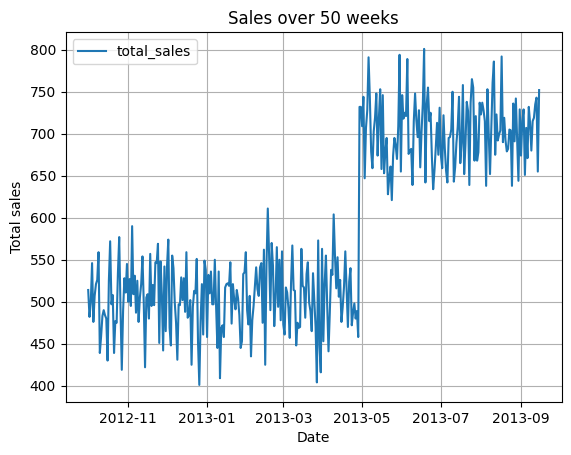

In [7]:
# Create a column with the extracted date from sale_time
all_data['sale_date'] = all_data['sale_time'].dt.date

# Group by day and count the number of sales
# .size() lets me count all the rows even those which are NaN for purchase gender
daily_sales = all_data.groupby('sale_date').size().reset_index(name='total_sales')

# Plot the total sales per day over the 50-week period
plt.figure(figsize = (15,15))
daily_sales.plot(kind='line', x='sale_date', y='total_sales')
plt.title('Sales over 50 weeks')
plt.xlabel('Date')
plt.ylabel('Total sales')
plt.grid()

`Observations from the Daily Sales Graph`
- Noticable jump in sales near the month of May. This might suggest some event put on by the company or policy changes
- Prices fluctuate in both phases and there is volatility among the phases. There is no clear trend within the Periods



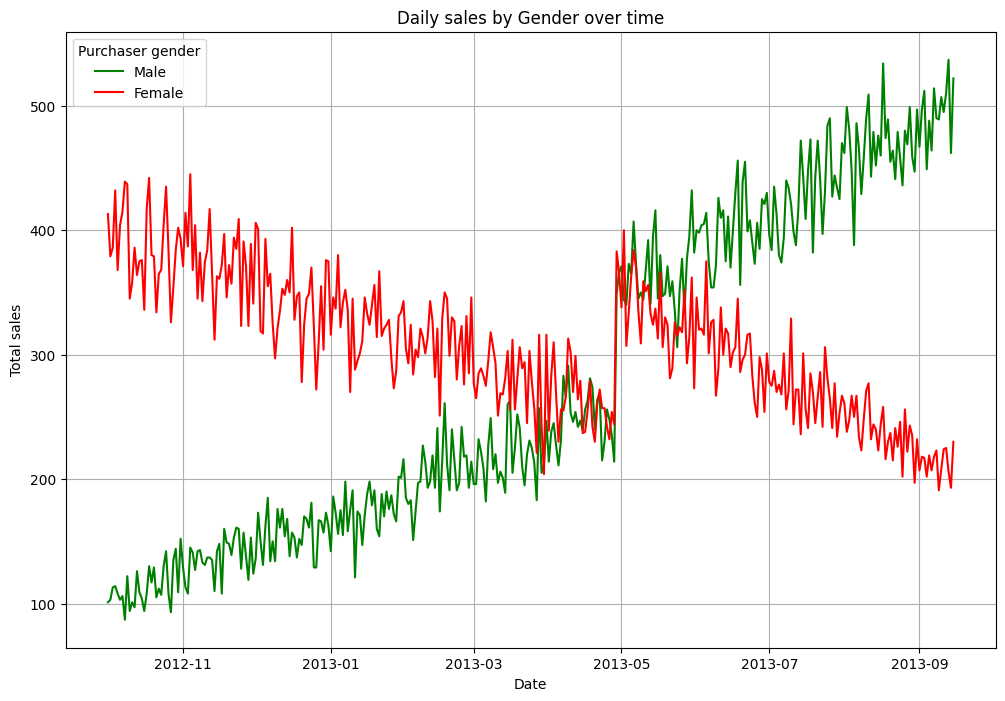

In [24]:
# Group by day and gender and then count the total sales made
male_female = all_data.groupby(['sale_date','purchaser_gender']).size().reset_index(name='daily_gender_sales')
# Pivot the data so each gender has its own column
male_female_pivot_df = male_female.pivot(index='sale_date', columns='purchaser_gender', values='daily_gender_sales')

# Plot graph
plt.figure(figsize = (12,8))
plt.plot(male_female_pivot_df.index, male_female_pivot_df['male'], label='Male',color='green')
plt.plot(male_female_pivot_df.index, male_female_pivot_df['female'], label='Female',color='red')

plt.title('Daily sales by Gender over time')
plt.xlabel('Date')
plt.ylabel('Total sales')
plt.grid()
plt.legend(title='Purchaser gender')

`Observations from the Purchaser gender Graph`
- Females had higher total purchases but with a gradual decline while male sales were the opposite
- This may indicate a high focus reaching male customers or shift in brand goals.

## Task 2

- Determine date of sudden change in daily sales

In [27]:
# Shifts all the total sale values down by one and fills the first row with nan
daily_sales['prev_day_total_sales'] = daily_sales['total_sales'].shift(1)
# Calculate the difference between daily sales
daily_sales['daily_sales_change'] = daily_sales['total_sales'] - daily_sales['prev_day_total_sales']

sale_date               2013-09-15
total_sales                    801
prev_day_total_sales         801.0
daily_sales_change           274.0
dtype: object

In [33]:
# Find the index label with the highest change
# Use .loc[] to access the row
daily_sales.loc[daily_sales['daily_sales_change'].idxmax()]

sale_date               2013-04-29
total_sales                    732
prev_day_total_sales         458.0
daily_sales_change           274.0
Name: 210, dtype: object